#### Memory in langchain

1. ability to refer information introduced earlier in the conversation.
   
2. Bare minimum, a conversational system should be able to access some window of past message directly.

3. More complex system will need to have a world model that it is constantly updating, which allows it to do things like maintain information about entities and their relationship.
   
4. We call this ability to store information about past interations memory.

5. Memory = previous query + present query data access.

6. Memories can be used directly or with help of chains

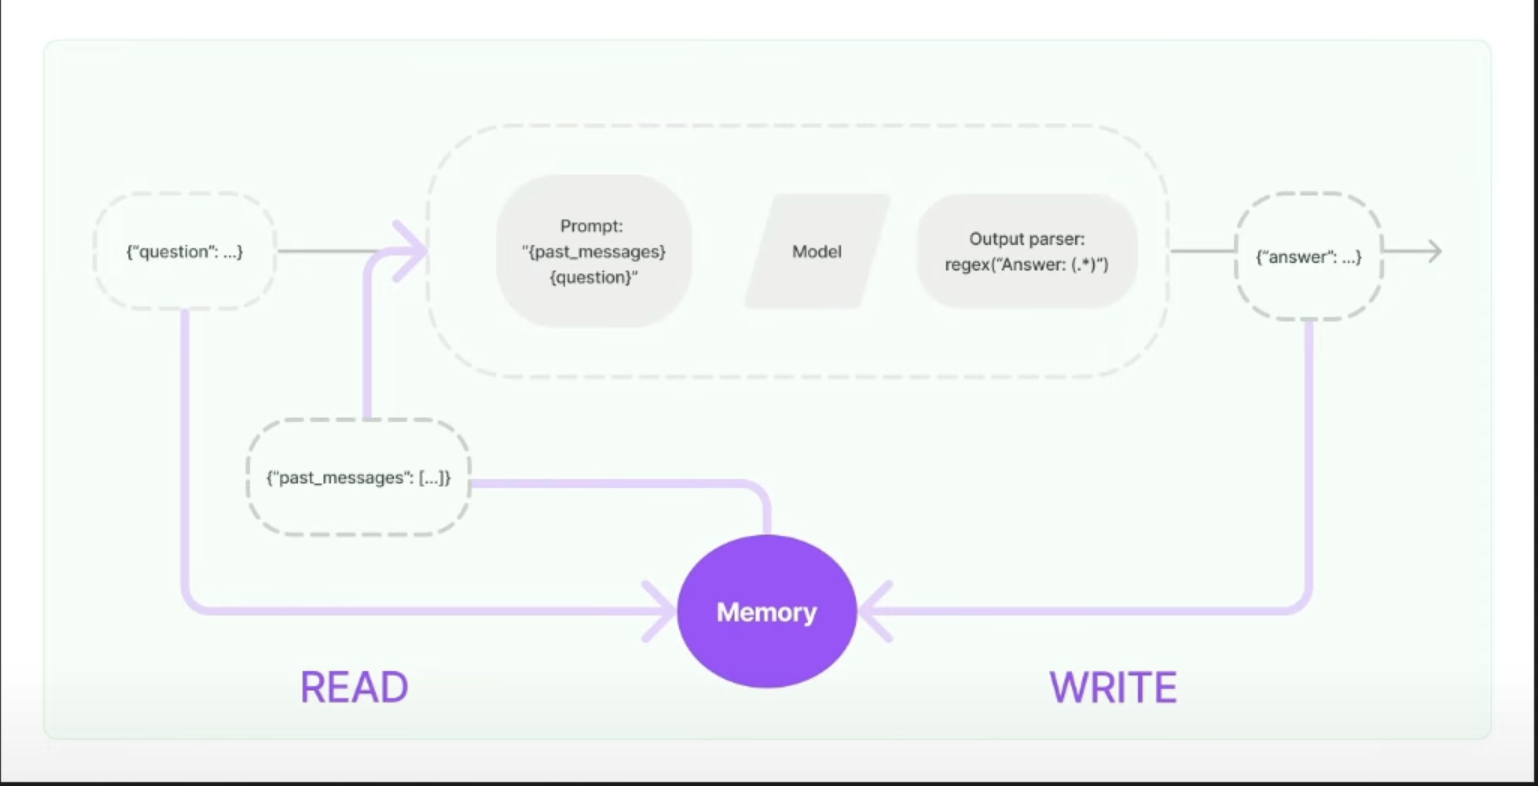

In [1]:
from IPython.display import Image
Image(filename='./data/MemoryLangchain.png')


#### Chat Messages

1. light weight wrapper that provides convenience method for saving HumanMessages, AIMessages, and then fetching them all.

2. May want to use this class directly if you are managing memeory outside of a chain.


In [3]:
import os
from dotenv import load_dotenv
load_dotenv()

SECRET_KEY = os.environ.get('OPEN_AI_KEY')

In [5]:
from langchain_openai import ChatOpenAI
from langchain.memory import ChatMessageHistory
chat  = ChatOpenAI(openai_api_key = SECRET_KEY)

In [7]:
# ChatMessageHistory

history = ChatMessageHistory()
history.add_user_message("Hi! There")
history.add_ai_message("Hello sir, What can i do for you ?")
print(history)

Human: Hi! There
AI: Hello sir, What can i do for you ?


In [15]:
# ConversationBufferMemory
from langchain.memory import ConversationBufferMemory

memory = ConversationBufferMemory()
memory.save_context(
    {"input" : "Hi! There!"},
    {"output" : "Hello sir, What can i do for you ?"}
)
print(memory.buffer)
print("------")
# print conversation as a dictionary 
print(memory.load_memory_variables({}))

Human: Hi! There!
AI: Hello sir, What can i do for you ?
------
{'history': 'Human: Hi! There!\nAI: Hello sir, What can i do for you ?'}


In [16]:
# Using ConversationBufferMemory in Chain
from langchain.chains import ConversationChain

memory = ConversationBufferMemory()
conversation = ConversationChain(llm = chat, 
                                 memory= memory,
                                 verbose = True)

conversation.predict(input = "Hi There")
conversation.predict(input = "What is the time in New Delhi ? ")
print(memory.buffer)





> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:

Human: Hi There
AI:


AuthenticationError: Error code: 401 - {'error': {'message': 'Incorrect API key provided: yourkeyhere. You can find your API key at https://platform.openai.com/account/api-keys.', 'type': 'invalid_request_error', 'param': None, 'code': 'invalid_api_key'}}

In [20]:
# ConversationBufferWindow
from langchain.memory import ConversationBufferWindowMemory
memory = ConversationBufferWindowMemory(k=1)
# k means how many conversations you want to remember,
# k = 1 means only the last ( recent ) 1 conversation will be saved
memory.save_context(
    {"input" : "Hi! There!"},
    {"output" : "Hello sir, What can i do for you ?"}
)
memory.save_context(
    {"input" : "Hi! XYZ!"},
    {"output" : "Hello sir, What can i do for you ?"}
)
print(memory.buffer)



Human: Hi! There!
AI: Hello sir, What can i do for you ?
Human: Hi! XYZ!
AI: Hello sir, What can i do for you ?


In [21]:
# Using ConversationalBufferWindowMemory in chain

from langchain.chains import ConversationChain
from langchain.memory import ConversationBufferWindowMemory

memory = ConversationBufferWindowMemory(k=1)
conversation = ConversationChain(llm = chat,
                                 memory = memory,
                                 verbose = True)

conversation.predict(input = "Hi There")
conversation.predict(input = "What is the time in New Delhi ? ")

print(memory.buffer)

# here it open a window where, here the reply to hi there is not visible (unless verbose)
# but the second inputs, output is visible. 
# the first message simply acts as a entry point and base to the second question




> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:

Human: Hi There
AI:


AuthenticationError: Error code: 401 - {'error': {'message': 'Incorrect API key provided: yourkeyhere. You can find your API key at https://platform.openai.com/account/api-keys.', 'type': 'invalid_request_error', 'param': None, 'code': 'invalid_api_key'}}

#### Entity

1. Entity memory remembers given facts about specific entities in a conversation. 

2. It extracts information on entities (using LLM) and builds up its knwoledge about the entity over time (also using LLM)


In [23]:
# ConversationEntityMemory

from langchain.memory import ConversationEntityMemory
from langchain.memory.prompt import ENTITY_MEMORY_CONVERSATION_TEMPLATE # using default template
from langchain.chains import ConversationChain

memory = ConversationEntityMemory(llm = chat)
conversation = ConversationChain(llm = chat,
                                 memory=memory, 
                                 prompt=ENTITY_MEMORY_CONVERSATION_TEMPLATE,
                                 verbose = True)

conversation.predict(input="Manchester City lost the quater finals")  #stating a fact
conversation.predict(input="Liverpool won the Champions League six times")  # stating a fact
conversation.predict(input="Leicester City won the Premier League in 2016")  # stating a fact

print(memory.buffer)
print(conversation.memory.entity_store.store) # information sent by you known to the llm
# essentially above line shows the information base created by llm over time
# this remembers you information (facts) and builds upon it overtime also answers your question about it accordingly

AuthenticationError: Error code: 401 - {'error': {'message': 'Incorrect API key provided: yourkeyhere. You can find your API key at https://platform.openai.com/account/api-keys.', 'type': 'invalid_request_error', 'param': None, 'code': 'invalid_api_key'}}

In [25]:
# ConversationSummaryBufferMemory 
from langchain.memory import ConversationSummaryBufferMemory
from langchain.chains import ConversationChain 

memory = ConversationSummaryBufferMemory(llm = chat,
                                         max_token_limit=50)
conversation = ConversationChain(
    llm = chat,
    memory = memory,
    verbose = True
)

conversation.predict(input="Why are people intimidated with AI ? ")
conversation.predict(input="Impact of AI on animals ? ")

print(memory.load_memory_variables({}))



# generates the response to your message and at the end
# give a summary of your chat



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:

Human: Why are people intimidated with AI ? 
AI:


AuthenticationError: Error code: 401 - {'error': {'message': 'Incorrect API key provided: yourkeyhere. You can find your API key at https://platform.openai.com/account/api-keys.', 'type': 'invalid_request_error', 'param': None, 'code': 'invalid_api_key'}}

#### Backed by a Vector Store

1. VectorStoreRetrieverMemory stores memories in a vector store and queries the top-K most 'salient' docs everytime it is called.

2. This differs from most of the other Memory classes in that it does not explicitly track the order of interaction.

3. In this case, the 'docs' are previous conversation snippets. This is useful to refer to relevant pieces of information that the AI was told earlier in the conversation.

In [26]:
# VectorStoreRetrieverMemory

from langchain_openai import OpenAIEmbeddings
from langchain.memory import VectorStoreRetrieverMemory
from langchain.chains import ConversationChain
from langchain_community.vectorstores import Chroma

#%pip install chroma

embedding_function = OpenAIEmbeddings(openai_api_key = SECRET_KEY)
db  = Chroma(embedding_function=embedding_function,
             persist_directory = './chro_db')
retriever = db.as_retriever()
memory = VectorStoreRetrieverMemory(retriever=retriever)

conversation = ConversationChain(
    llm = chat,
    memory = memory,
    verbose = True
)

conversation.predict(input="Why are people intimidated with AI ? ")
conversation.predict(input="Impact of AI on animals ? ")
conversation.predict(input="I like pepe ")
conversation.predict(input="What do i like ? ")


# here the responses are stored to the chro_db as well 

AuthenticationError: Error code: 401 - {'error': {'message': 'Incorrect API key provided: yourkeyhere. You can find your API key at https://platform.openai.com/account/api-keys.', 'type': 'invalid_request_error', 'param': None, 'code': 'invalid_api_key'}}